# Retention Modeling at Scholastic Travel Company (A)

La problematica requiere de crear un modelo de retención de clientes efectivo que pueda predecir cuáles clientes es probable que reserven nuevamente con STC en el próximo año escolar.

Especificamente saber cuáles clientes reservarán con Scholastic Travel Company (STC) en el año escolar 2013-14 (otoño 2013 a primavera 2014), basándose en los datos disponibles hasta la primavera de 2013.

Esto significa que, para entrenar el modelo, se usará los datos del año escolar 2012-13, que muestran si se ha mantenido o no un cierto grupo, y se intentará predecir en base a la información del perfil del cliente hasta el final del año escolar 2011-12.

Este modelo será utilizado para informar y optimizar la estrategia de marketing de la compañía.



## Importar (libreria & Base de datos)

In [1]:
#Importamos todas las librerias que nos pueden ser de utilidad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
!pip install pandas openpyxl

In [2]:
url81 = 'https://drive.google.com/u/0/uc?id=1JiLgQkf1E9XAQGrn5hAJIb1Qa2Mt7fw_&export=download'
data81 = pd.read_excel(url81, sheet_name='Exhibit 1 -- Data', engine='openpyxl')
data81

ID Program.Code  \
0                                                     1           HS   
1                                                     2           HC   
2                                                     3           HD   
3                                                     4           HN   
4                                                     5           HD   
...                                                 ...          ...   
2387                                               2388           HS   
2388                                               2389           HD   
2389                                                NaN          NaN   
2390                                                NaN          NaN   
2391  Data source: Company data adjusted by author u...          NaN   

      From.Grade  To.Grade Group.State  Is.Non.Annual.  Days Travel.Type  \
0            4.0       4.0          CA             0.0   1.0           A   
1            8.0       8.0          AZ             0.0   7.0           A   
2            8.0       8.0          FL             0.0   3.0           A   
3            9.0      12.0          VA             1.0   3.0           B   
4            6.0       8.0          FL             0.0   6.0           T   
...          ...       ...         ...             ...   ...         ...   
2387         4.0       4.0          CA             0.0   1.0           A   
2388         8.0       8.0          WA             0.0   6.0           A   
2389         NaN       NaN         NaN             NaN   NaN         NaN   
2390         NaN       NaN         NaN             NaN   NaN         NaN   
2391         NaN       NaN         NaN             NaN   NaN         NaN   

     Departure.Date Return.Date  ... GroupGradeTypeLow GroupGradeTypeHigh  \
0        2011-01-14  2011-01-14  ...                 K         Elementary   
1        2011-01-14  2011-01-21  ...            Middle             Middle   
2        2011-01-15  2011-01-17  ...            Middle             Middle   
3        2011-01-15  2011-01-17  ...         Undefined          Undefined   
4        2011-01-16  2011-01-21  ...            Middle             Middle   
...             ...         ...  ...               ...                ...   
2387     2011-06-30  2011-06-30  ...         Undefined          Undefined   
2388     2011-06-30  2011-07-05  ...            Middle             Middle   
2389            NaT         NaT  ...               NaN                NaN   
2390            NaT         NaT  ...               NaN                NaN   
2391            NaT         NaT  ...               NaN                NaN   

            GroupGradeType  MajorProgramCode  SingleGradeTripFlag  \
0            K->Elementary                 H                  1.0   
1           Middle->Middle                 H                  1.0   
2           Middle->Middle                 H                  1.0   
3     Undefined->Undefined                 H                  0.0   
4           Middle->Middle                 H                  0.0   
...                    ...               ...                  ...   
2387  Undefined->Undefined                 H                  1.0   
2388        Middle->Middle                 H                  1.0   
2389                   NaN               NaN                  NaN   
2390                   NaN               NaN                  NaN   
2391                   NaN               NaN                  NaN   

      FPP.to.School.enrollment FPP.to.PAX Num.of.Non_FPP.PAX  \
0                     0.063646   0.936508                4.0   
1                     0.025882   0.880000                3.0   
2                     0.025131   0.888889                3.0   
3                          NaN   1.000000                0.0   
4                     0.112500   0.910112                8.0   
...                        ...        ...                ...   
2387                       NaN   0.941176                1.0   
2388     

## Analisis Exploratorio

### Visualización de los datos

#### Identificar columnas

In [3]:
columnas = data81.columns
print(columnas)

Index(['ID', 'Program.Code', 'From.Grade', 'To.Grade', 'Group.State',
       'Is.Non.Annual.', 'Days', 'Travel.Type', 'Departure.Date',
       'Return.Date', 'Deposit.Date', 'Special.Pay', 'Tuition', 'FRP.Active',
       'FRP.Cancelled', 'FRP.Take.up.percent.', 'Early.RPL', 'Latest.RPL',
       'Cancelled.Pax', 'Total.Discount.Pax', 'Initial.System.Date',
       'Poverty.Code', 'Region', 'CRM.Segment', 'School.Type',
       'Parent.Meeting.Flag', 'MDR.Low.Grade', 'MDR.High.Grade',
       'Total.School.Enrollment', 'Income.Level', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'SPR.Product.Type', 'SPR.New.Existing', 'FPP',
       'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents',
       'FirstMeeting', 'LastMeeting', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SchoolGradeTypeLow',
       'SchoolGradeTypeHigh', 'SchoolGradeType', 'DepartureMonth',
       'GroupGradeTypeLow', 'GroupGradeTypeHigh', 'GroupGradeType',
       'MajorProgramCode', '

#### Total de variables

In [4]:
data81.shape

(2392, 56)

#### Identificar variables numericas y categoricas

In [5]:
print(data81.dtypes)

ID                                        object
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                           float64
Days                                     float64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                  float64
FRP.Active                               float64
FRP.Cancelled                            float64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                            float64
Total.Discount.Pax                       float64
Initial.System.Date 

#### Composicion de los datos

In [6]:
data81.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2390 non-null   object        
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

#### Identificar los valores perdidos

In [7]:
data81.isnull().sum()

ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

<Axes: >

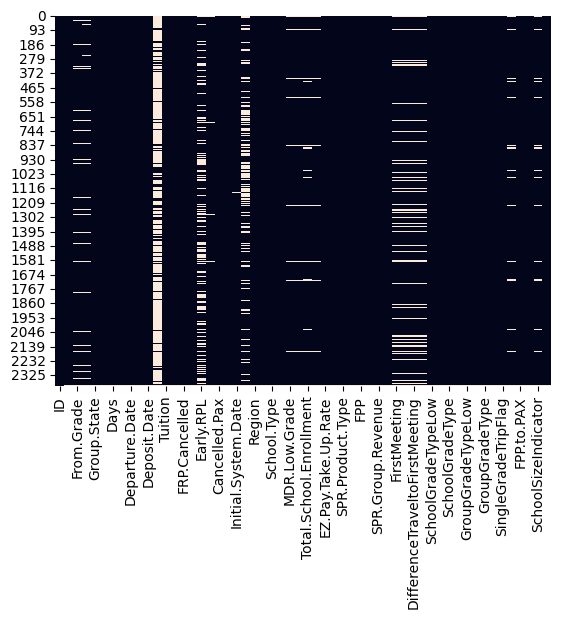

In [8]:
sns.heatmap(data81.isnull(), cbar=False)

#### Distribución de variables

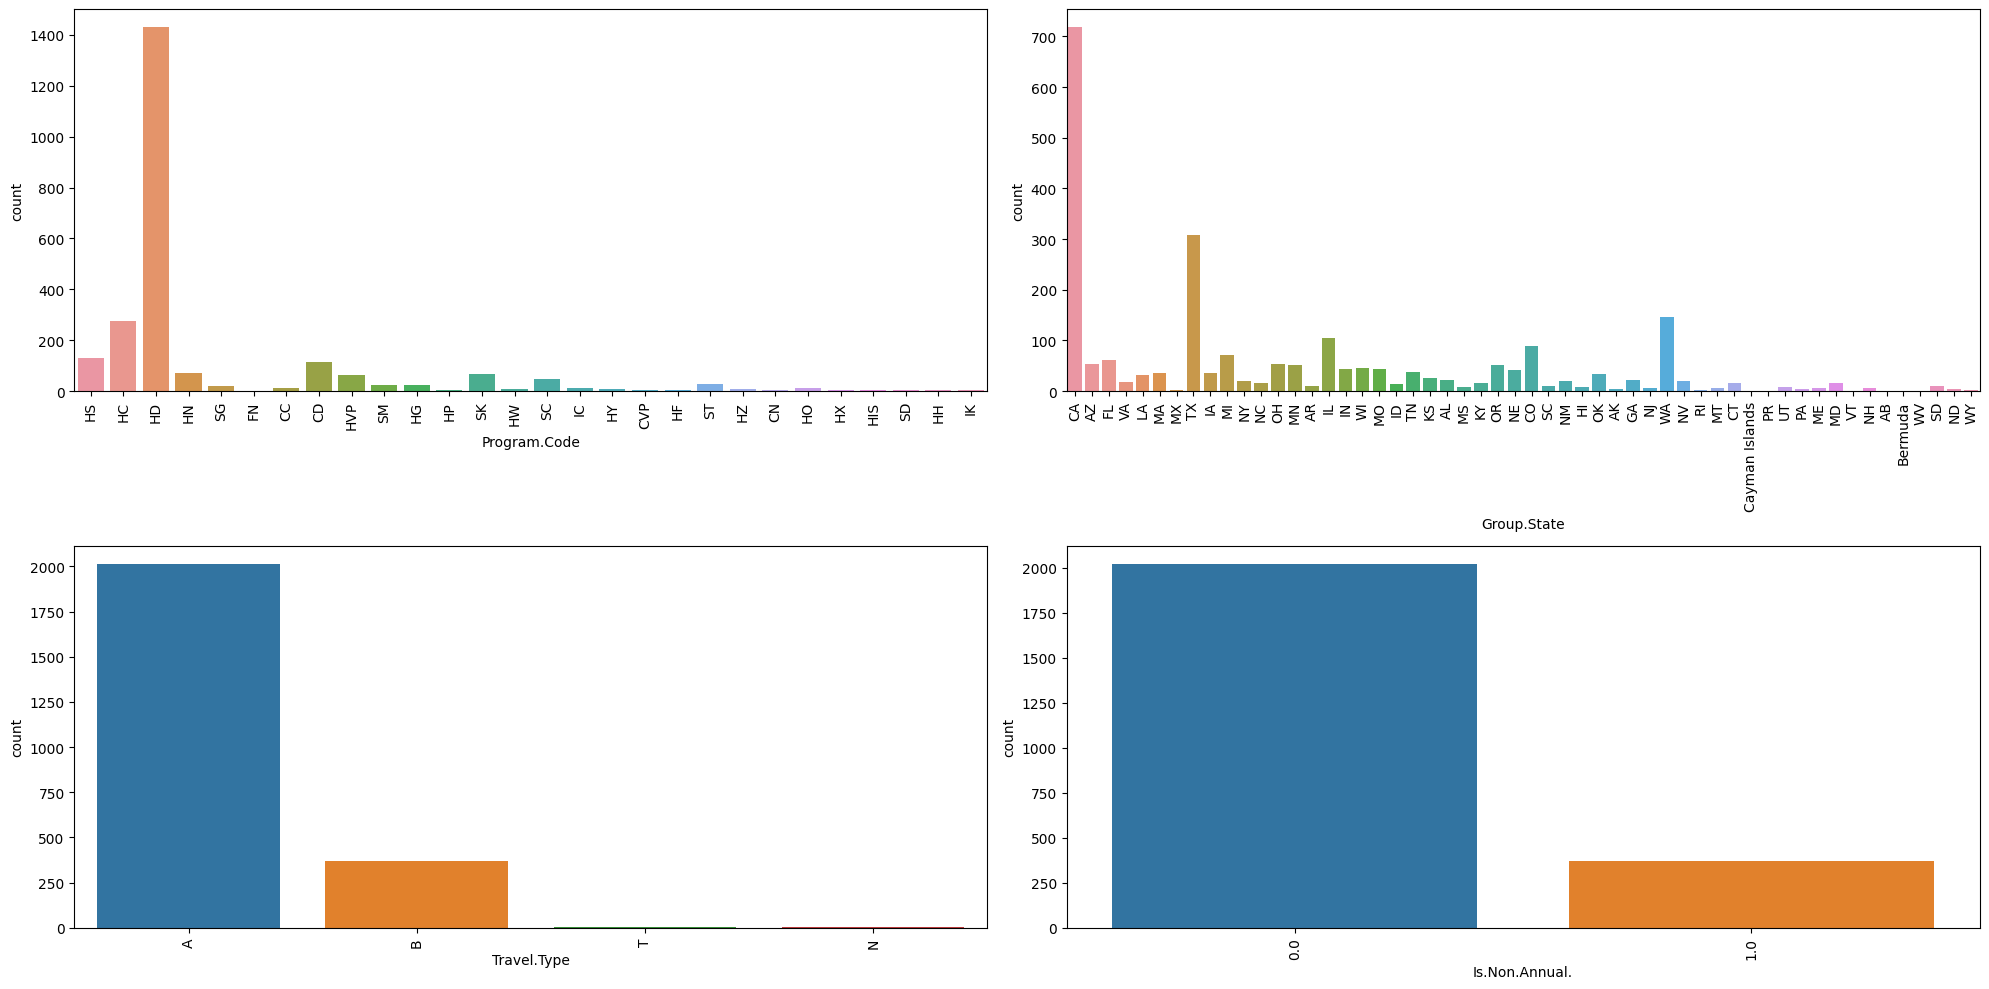

In [9]:
categorical_vars = ['Program.Code', 'Group.State', 'Travel.Type', 'Is.Non.Annual.']
numerical_vars = ['From.Grade', 'To.Grade', 'Days']

data_categorical = data81[categorical_vars]
data_numerical = data81[numerical_vars]

# Crear figuras con subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# Crear un countplot para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data_categorical, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

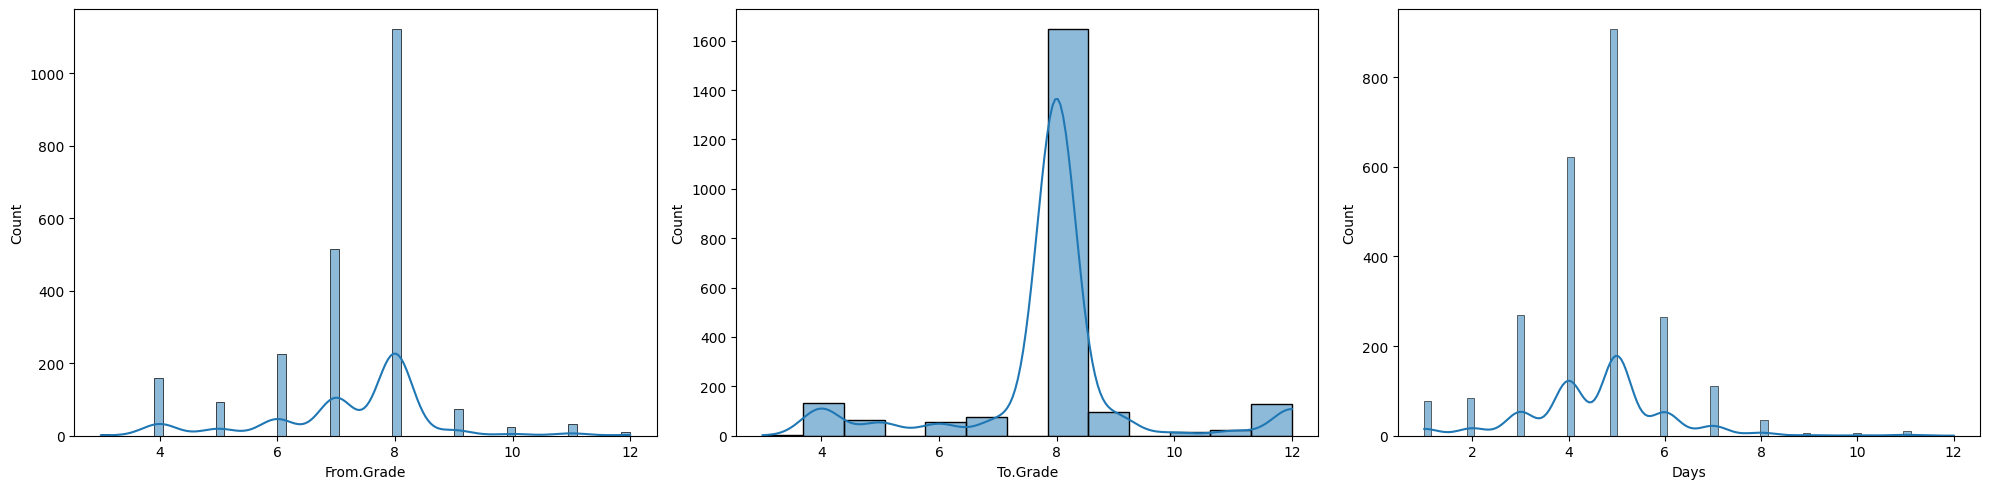

In [10]:
# Crear figuras con subplots para histogramas y diagramas de cajas
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

# Crear histogramas para cada variable numérica
for i, var in enumerate(numerical_vars):
    sns.histplot(data=data_numerical, x=var, ax=axs[i], kde=True)

fig.tight_layout()
plt.show()

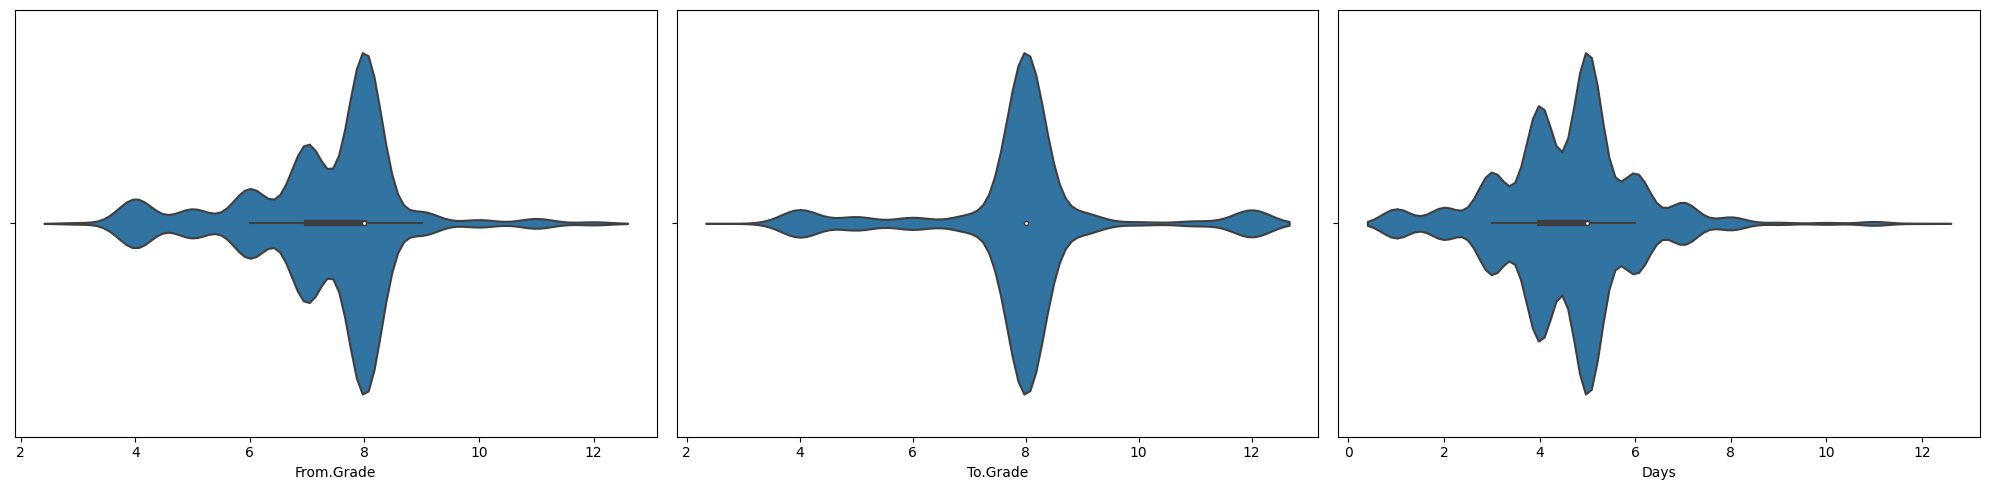

In [11]:
  fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs = axs.flatten()

for i, var in enumerate(numerical_vars):
    sns.violinplot(x=var, data=data_numerical, ax=axs[i])

fig.tight_layout()
plt.show()

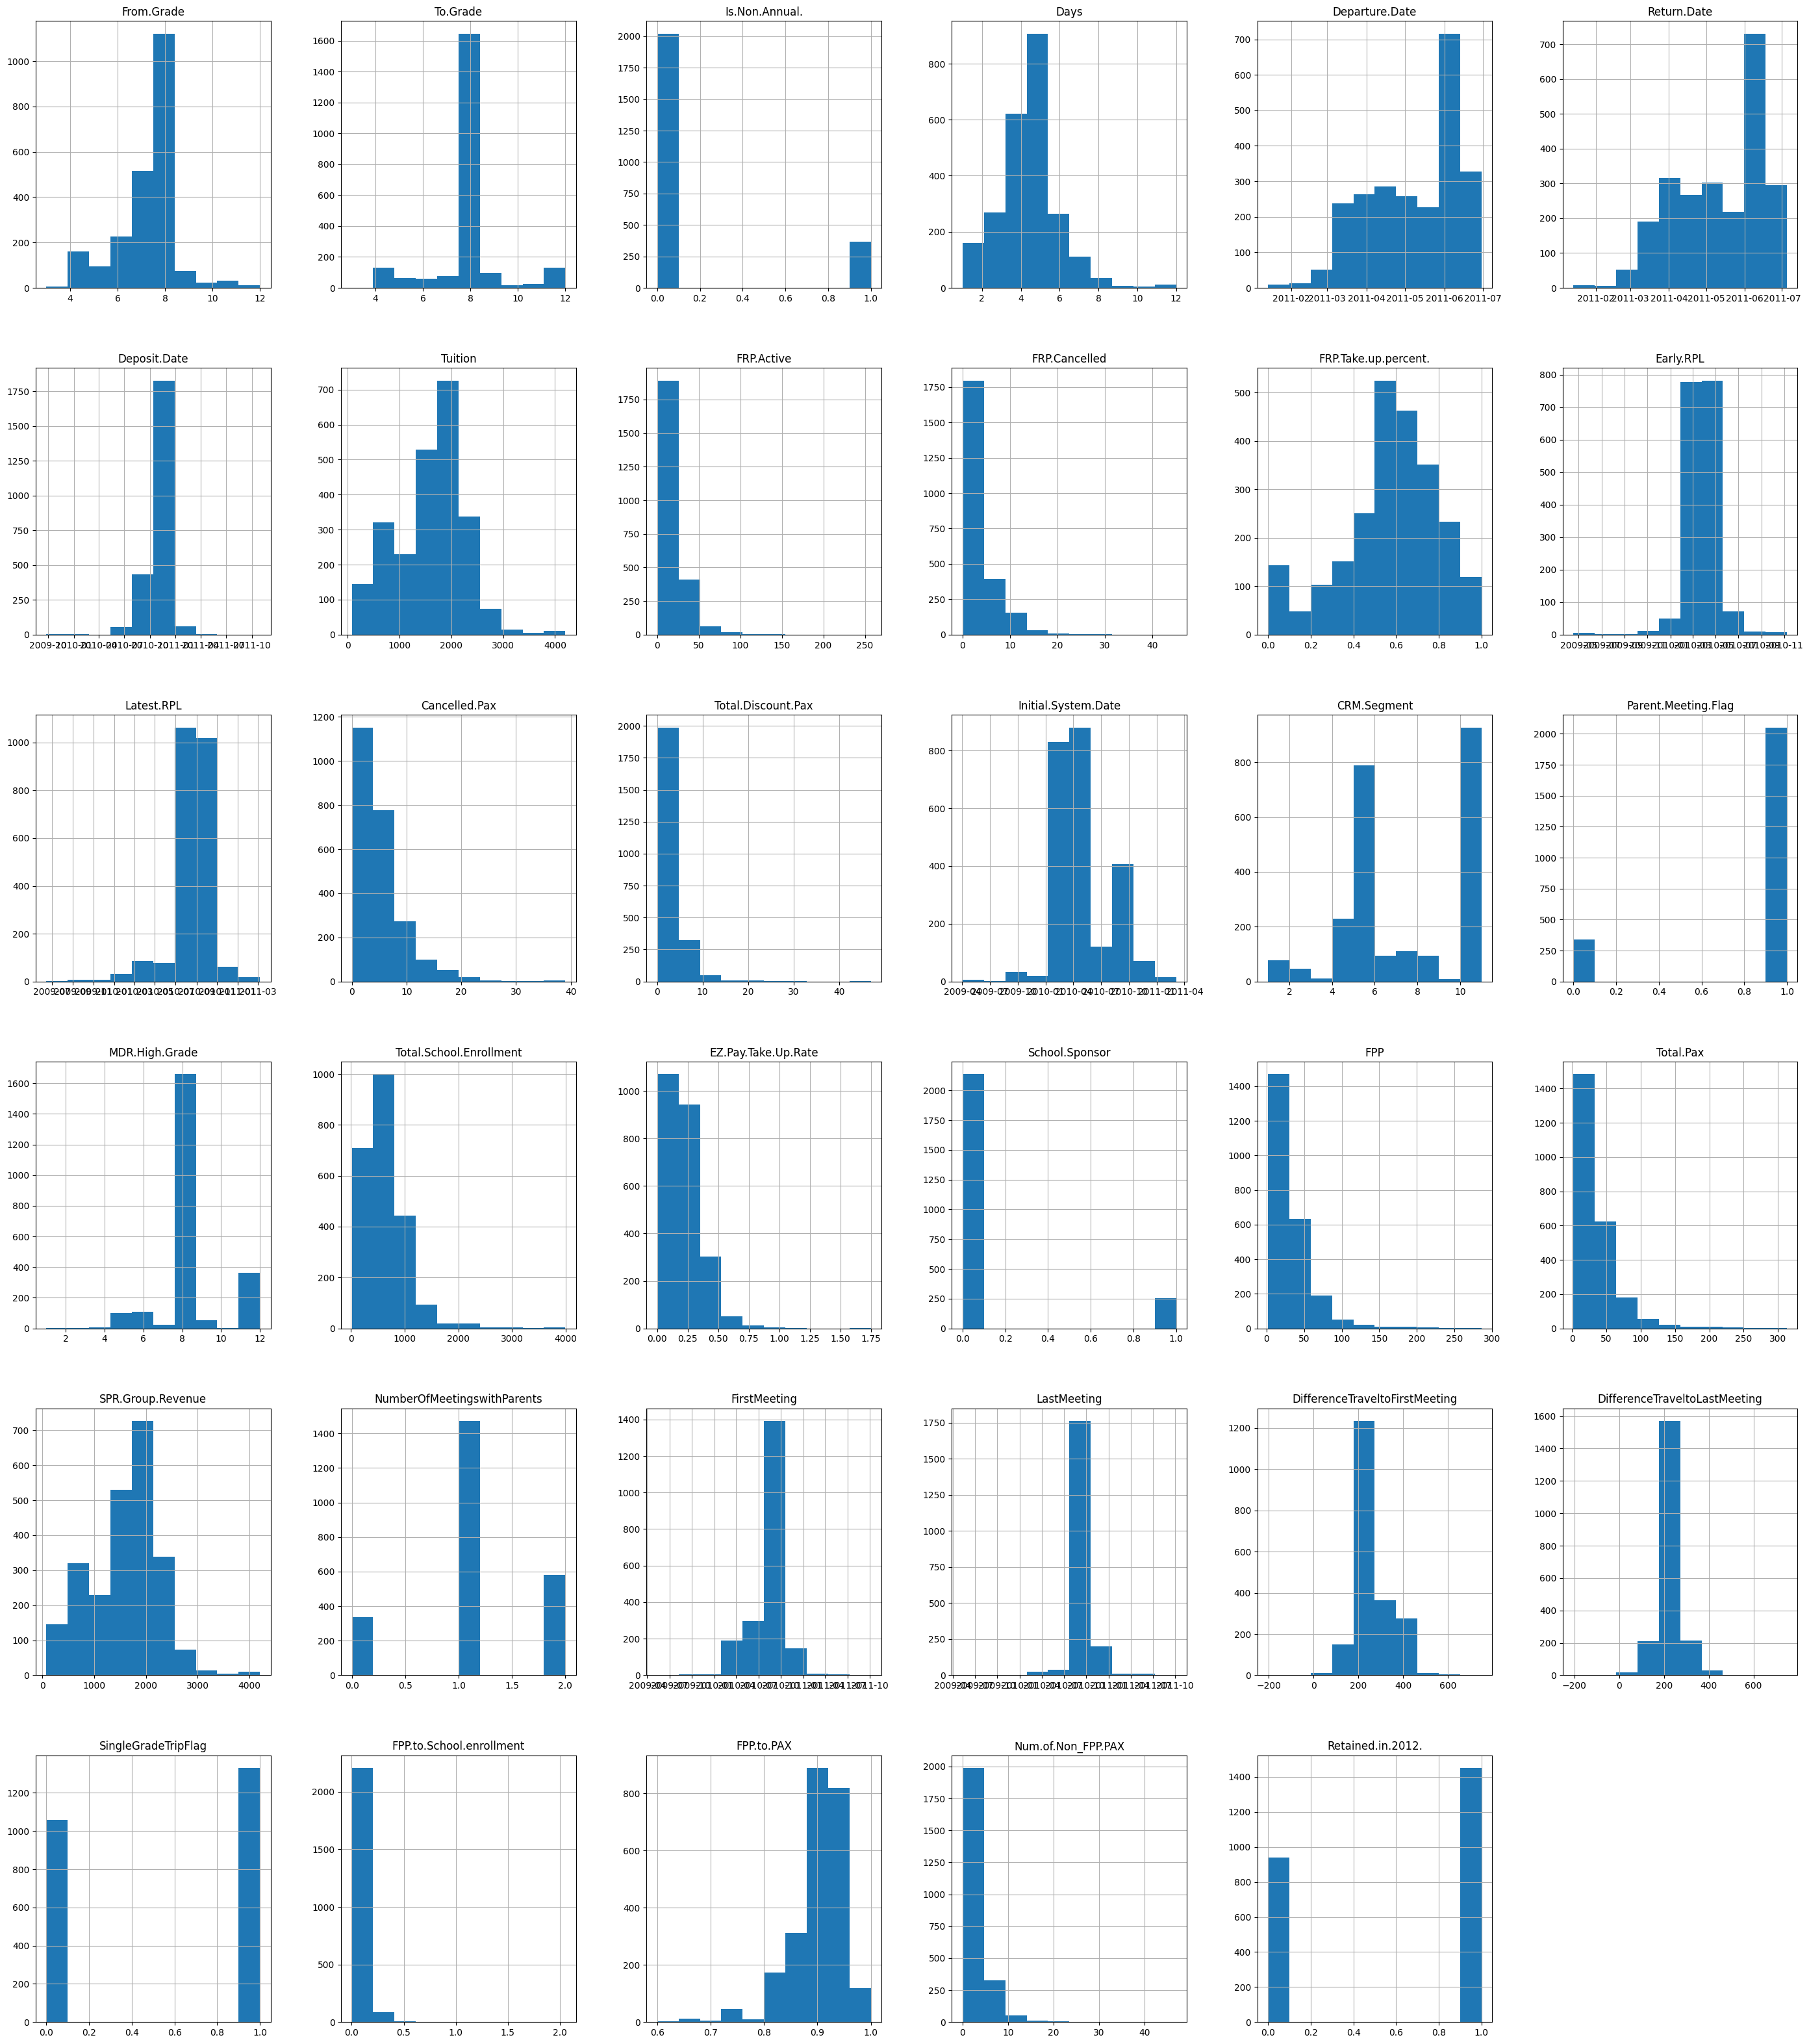

In [12]:
data81.hist(figsize=(35, 40))
plt.show()

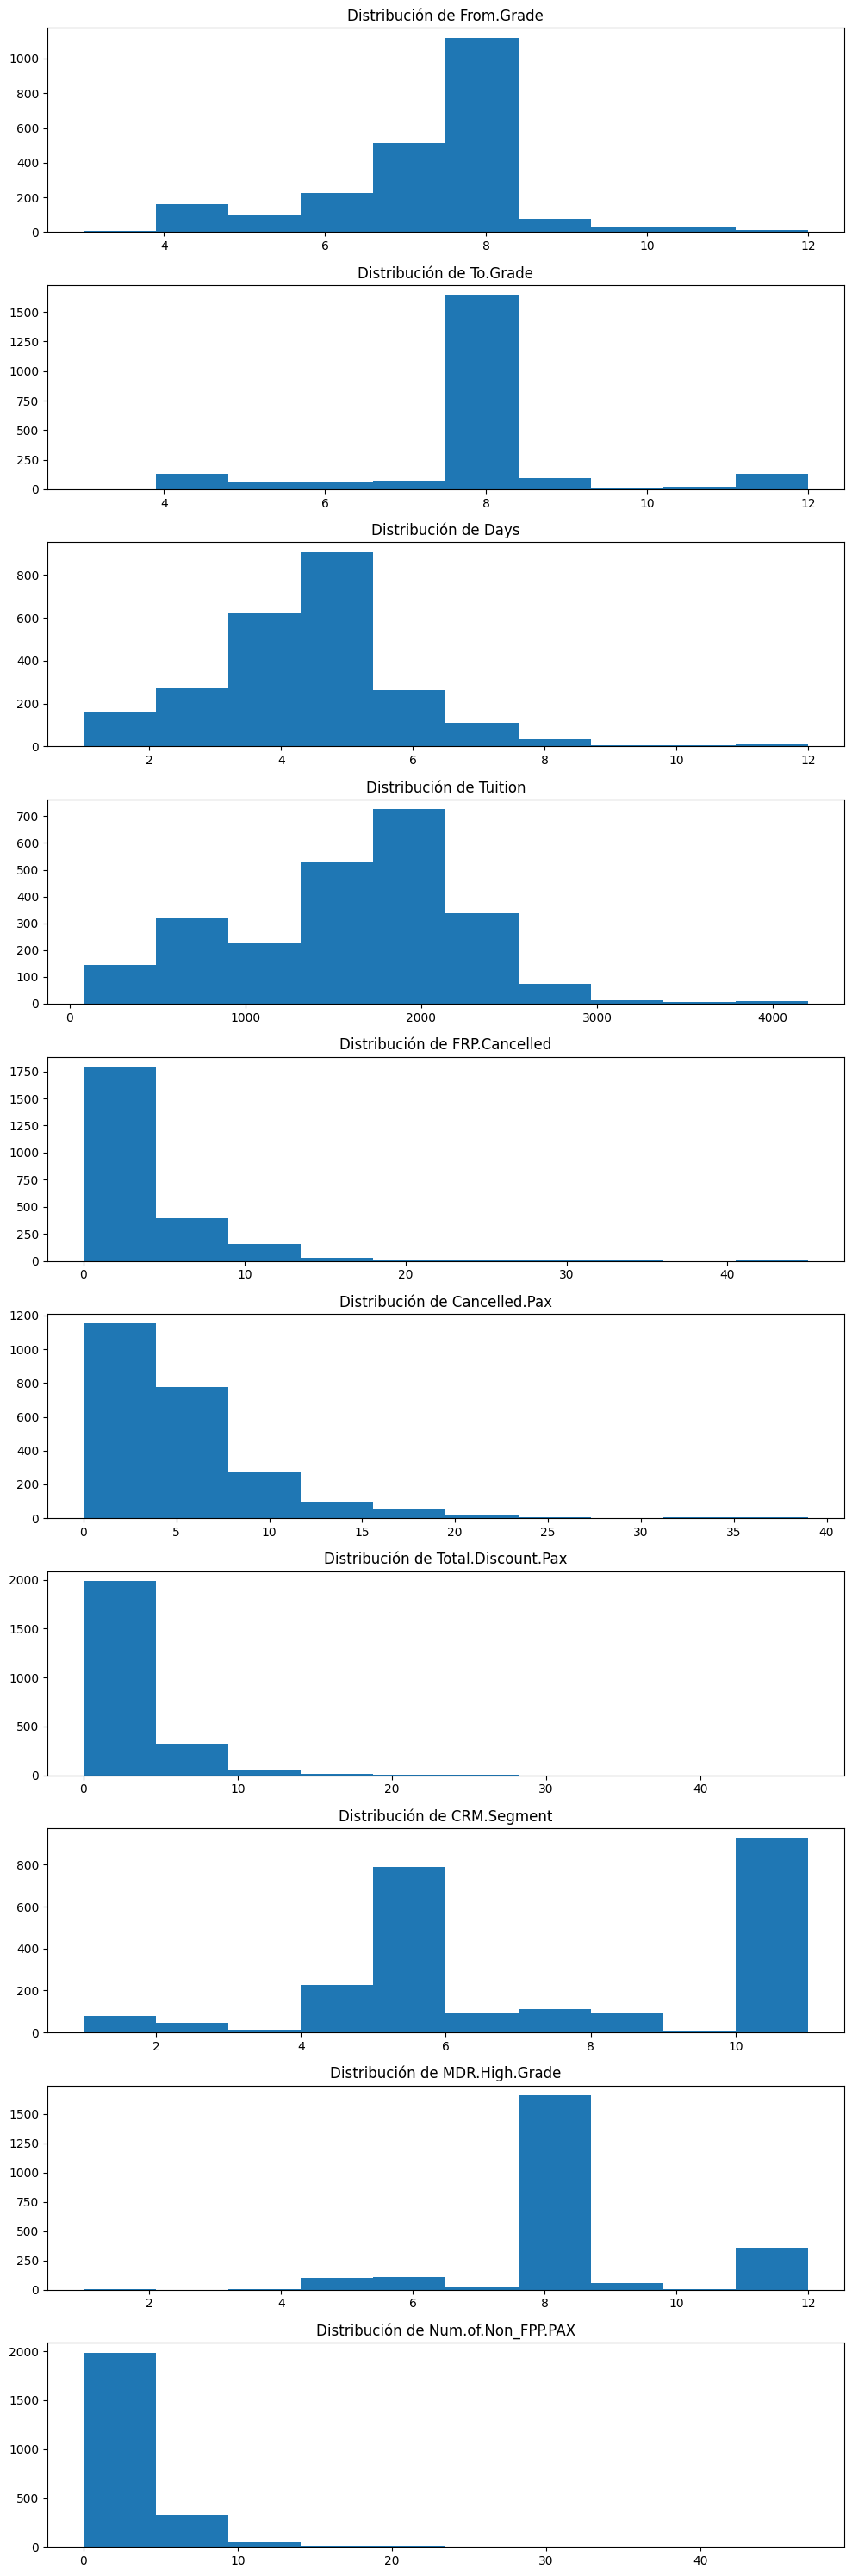

In [13]:
variables_numericas = ['From.Grade', 'To.Grade', 'Days', 'Tuition', 'FRP.Cancelled',
                      'Cancelled.Pax', 'Total.Discount.Pax', 'CRM.Segment', 'MDR.High.Grade',
                       'Num.of.Non_FPP.PAX']

fig, axs = plt.subplots(nrows=len(variables_numericas), figsize=(10, 30))

for i, var in enumerate(variables_numericas):
    axs[i].hist(data81[var])
    axs[i].set_title(f'Distribución de {var}')

plt.tight_layout()
plt.show()

### Estadísticas descriptivas:

#### Resumen estadístico del DataFrame

In [14]:
data81.describe()

From.Grade     To.Grade  Is.Non.Annual.         Days      Tuition  \
count  2262.000000  2239.000000     2389.000000  2389.000000  2389.000000   
mean      7.268347     7.912908        0.154039     4.575136  1615.217664   
std       1.388350     1.558226        0.361062     1.432128   645.096047   
min       3.000000     3.000000        0.000000     1.000000    79.000000   
25%       7.000000     8.000000        0.000000     4.000000  1174.000000   
50%       8.000000     8.000000        0.000000     5.000000  1700.000000   
75%       8.000000     8.000000        0.000000     5.000000  2048.000000   
max      12.000000    12.000000        1.000000    12.000000  4200.000000   

        FRP.Active  FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  \
count  2389.000000    2389.000000           2389.000000    2389.000000   
mean     16.867727       3.305567              0.570743       4.807451   
std      16.942782       3.677022              0.230666       4.661194   
min       0.000000       0.000000              0.000000       0.000000   
25%       6.000000       1.000000              0.455000       2.000000   
50%      12.000000       2.000000              0.600000       4.000000   
75%      23.000000       4.000000              0.727000       6.000000   
max     257.000000      45.000000              1.000000      39.000000   

       Total.Discount.Pax  ...    Total.Pax  SPR.Group.Revenue  \
count         2389.000000  ...  2389.000000        2389.000000   
mean             2.953537  ...    34.250733        1615.217664   
std              2.876422  ...    31.590096         645.096047   
min              0.000000  ...     2.000000          79.000000   
25%              1.000000  ...    14.000000        1174.000000   
50%              2.000000  ...    26.000000        1700.000000   
75%              4.000000  ...    44.000000        2048.000000   
max             47.000000  ...   313.000000        4200.000000   

       NumberOfMeetingswithParents  DifferenceTraveltoFirstMeeting  \
count                  2389.000000                     2052.000000   
mean                      1.102135                      262.083821   
std                       0.611544                       79.520208   
min                       0.000000                     -204.000000   
25%                       1.000000                      208.000000   
50%                       1.000000                      250.000000   
75%                       1.000000                      287.000000   
max                       2.000000                      749.000000   

       DifferenceTraveltoLastMeeting  SingleGradeTripFlag  \
count                    2052.000000          2389.000000   
mean                      228.978070             0.556718   
std                        53.636014             0.496877   
min                      -204.000000             0.000000   
25%                       196.750000             0.000000   
50%                       233.000000             1.000000   
75%                       261.000000             1.000000   
max                       749.000000             1.000000   

       FPP.to.School.enrollment   FPP.to.PAX  Num.of.Non_FPP.PAX  \
count               2298.000000  2389.000000         2389.000000   
mean                   0.066184     0.900667            2.953537   
std                    0.081112     0.049119            2.876422   
min                    0.000922     0.600000            0.000000   
25%                    0.020787     0.882353            1.000000   
50%                    0.045256     0.909091            2.000000   
75%                    0.087517     0.933333            4.000000   
max                    2.052632     1.000000           47.000000   

       Retained.in.2012.  
count        2389.000000  
mean            0.607367  
std             0.488439  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             1.000000  
max             1.000000  

[8 rows x 27 c

#### Número de valores distintos en las variables.

In [15]:
unique_counts = data81.nunique().sort_values(ascending=False)
print(unique_counts)


ID                                2390
FPP.to.School.enrollment          1909
Tuition                           1230
SPR.Group.Revenue                 1230
Total.School.Enrollment            893
FRP.Take.up.percent.               476
EZ.Pay.Take.Up.Rate                371
DifferenceTraveltoFirstMeeting     342
FPP.to.PAX                         306
Initial.System.Date                296
DifferenceTraveltoLastMeeting      251
Latest.RPL                         215
FirstMeeting                       207
LastMeeting                        172
Total.Pax                          159
FPP                                146
Departure.Date                     144
Return.Date                        143
Early.RPL                          141
Deposit.Date                       135
FRP.Active                          93
Group.State                         54
Cancelled.Pax                       34
FRP.Cancelled                       29
Program.Code                        28
Total.Discount.Pax       

### Manejo de datos faltantes

#### Variables con valores nulos

In [16]:
null_columns = data81.isnull().any()
null_columns_sorted = null_columns.sort_values(ascending=False)[:56]
print(null_columns_sorted)

ID                                True
Program.Code                      True
EZ.Pay.Take.Up.Rate               True
School.Sponsor                    True
SPR.Product.Type                  True
SPR.New.Existing                  True
FPP                               True
Total.Pax                         True
SPR.Group.Revenue                 True
NumberOfMeetingswithParents       True
FirstMeeting                      True
LastMeeting                       True
DifferenceTraveltoFirstMeeting    True
DifferenceTraveltoLastMeeting     True
SchoolGradeTypeLow                True
SchoolGradeTypeHigh               True
SchoolGradeType                   True
DepartureMonth                    True
GroupGradeTypeLow                 True
GroupGradeTypeHigh                True
GroupGradeType                    True
MajorProgramCode                  True
SingleGradeTripFlag               True
FPP.to.School.enrollment          True
FPP.to.PAX                        True
Num.of.Non_FPP.PAX       

#### Cantidad de valores nulos

In [17]:
data81.isnull().sum()


ID                                   2
Program.Code                         3
From.Grade                         130
To.Grade                           153
Group.State                          3
Is.Non.Annual.                       3
Days                                 3
Travel.Type                          3
Departure.Date                       3
Return.Date                          3
Deposit.Date                         3
Special.Pay                       1922
Tuition                              3
FRP.Active                           3
FRP.Cancelled                        3
FRP.Take.up.percent.                 3
Early.RPL                          676
Latest.RPL                          22
Cancelled.Pax                        3
Total.Discount.Pax                   3
Initial.System.Date                 11
Poverty.Code                       602
Region                               3
CRM.Segment                          7
School.Type                          3
Parent.Meeting.Flag      

#### Porcentaje de valores nulos

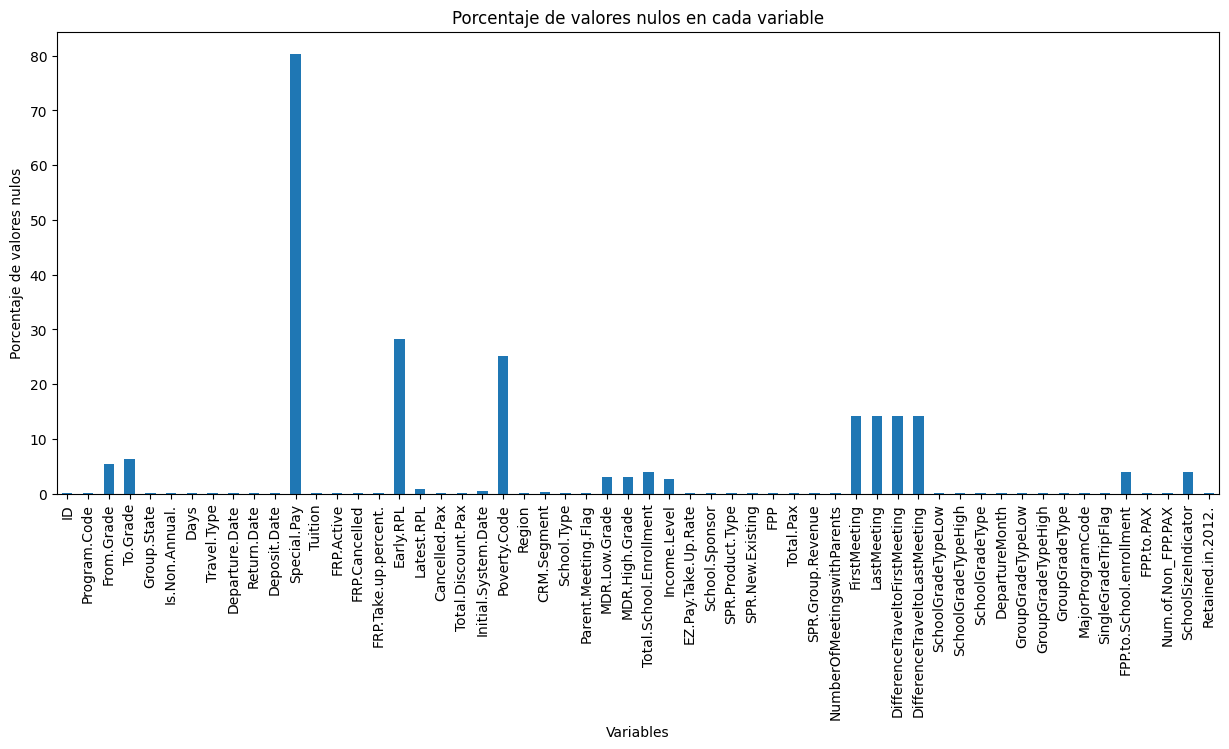

In [18]:
null_percentages = (data81.isnull().sum() / len(data81)) * 100

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 6))

null_percentages.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de valores nulos')
plt.title('Porcentaje de valores nulos en cada variable')
plt.show()



In [19]:
for var in variables_numericas:
  print("% de valores nulos " + var +": \t "+ "{:,.2f}%".format( data81[var].isnull().sum() / data81.shape[0] *100))

% de valores nulos From.Grade: 	 5.43%
% de valores nulos To.Grade: 	 6.40%
% de valores nulos Days: 	 0.13%
% de valores nulos Tuition: 	 0.13%
% de valores nulos FRP.Cancelled: 	 0.13%
% de valores nulos Cancelled.Pax: 	 0.13%
% de valores nulos Total.Discount.Pax: 	 0.13%
% de valores nulos CRM.Segment: 	 0.29%
% de valores nulos MDR.High.Grade: 	 2.97%
% de valores nulos Num.of.Non_FPP.PAX: 	 0.13%


### Análisis de relaciones

#### Matriz de correlación

In [20]:
data81.corr()  # Matriz de correlación

<ipython-input-20-510f3424b28f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data81.corr()  # Matriz de correlación


From.Grade  To.Grade  Is.Non.Annual.  \
From.Grade                        1.000000  0.779775       -0.107391   
To.Grade                          0.779775  1.000000        0.092553   
Is.Non.Annual.                   -0.107391  0.092553        1.000000   
Days                              0.402515  0.440916        0.019720   
Tuition                           0.313262  0.414692        0.056052   
FRP.Active                        0.094622 -0.063830       -0.033359   
FRP.Cancelled                     0.076536  0.029503       -0.009289   
FRP.Take.up.percent.              0.133030  0.154540        0.061712   
Cancelled.Pax                     0.062403  0.048955       -0.020190   
Total.Discount.Pax                0.151813  0.014050       -0.060039   
CRM.Segment                       0.246724  0.232147        0.039884   
Parent.Meeting.Flag               0.127055  0.143847        0.043010   
MDR.High.Grade                    0.487057  0.581006        0.046171   
Total.School.Enrollment           0.186064  0.161579       -0.134376   
EZ.Pay.Take.Up.Rate               0.055754  0.055798        0.061965   
School.Sponsor                   -0.315270 -0.370151       -0.003663   
FPP                               0.031089 -0.140358       -0.072195   
Total.Pax                         0.042538 -0.128152       -0.072043   
SPR.Group.Revenue                 0.313262  0.414692        0.056052   
NumberOfMeetingswithParents       0.089202  0.134745        0.063371   
DifferenceTraveltoFirstMeeting   -0.032032  0.046226        0.111056   
DifferenceTraveltoLastMeeting    -0.040250  0.028065        0.064330   
SingleGradeTripFlag               0.196779 -0.322935       -0.352164   
FPP.to.School.enrollment         -0.062839 -0.107073        0.075935   
FPP.to.PAX                       -0.122717 -0.246170        0.020026   
Num.of.Non_FPP.PAX                0.151813  0.014050       -0.060039   
Retained.in.2012.                 0.083220 -0.200470       -0.390633   

                                    Days   Tuition  FRP.Active  FRP.Cancelled  \
From.Grade                      0.402515  0.313262    0.094622       0.076536   
To.Grade                        0.440916  0.414692   -0.063830       0.029503   
Is.Non.Annual.                  0.019720  0.056052   -0.033359      -0.009289   
Days                            1.000000  0.772086   -0.037300       0.058620   
Tuition                         0.772086  1.000000   -0.225533      -0.007369   
FRP.Active                     -0.037300 -0.225533    1.000000       0.463491   
FRP.Cancelled                   0.058620 -0.007369    0.463491       1.000000   
FRP.Take.up.percent.            0.069282  0.175085    0.269307       0.180026   
Cancelled.Pax                   0.052793 -0.026192    0.383178       0.850347   
Total.Discount.Pax             -0.001338 -0.218439    0.698390       0.323035   
CRM.Segment                    -0.018599 -0.073536    0.027741       0.038990   
Parent.Meeting.Flag             0.142625  0.157659    0.068607       0.132144   
MDR.High.Grade                  0.242661  0.178791   -0.013089      -0.039826   
Total.School.Enrollment         0.135481  0.147744    0.091351       0.133532   
EZ.Pay.Take.Up.Rate             0.066963  0.098941    0.108399       0.107432   
School.Sponsor                 -0.222797 -0.246801    0.078897      -0.032677   
FPP                            -0.116036 -0.364922    0.815323       0.341100   
Total.Pax                      -0.107127 -0.356411    0.815460       0.343967   
SPR.Group.Revenue               0.772086  1.000000   -0.225533      -0.007369   
NumberOfMeetingswithParents     0.127983  0.153833    0.000334       0.107907   
DifferenceTraveltoFirstMeeting  0.088838  0.130842   -0.120211       0.029818   
DifferenceTraveltoLastMeeting   0.053798  0.102268   -0.105919       0.027411   
SingleGradeTripFlag            -0.117656 -0.179277    0.213394       0.059500   
FPP.to.School.enrollment       -0.109527 -0.277246    0.393675       0.

#### Mapa de correlación

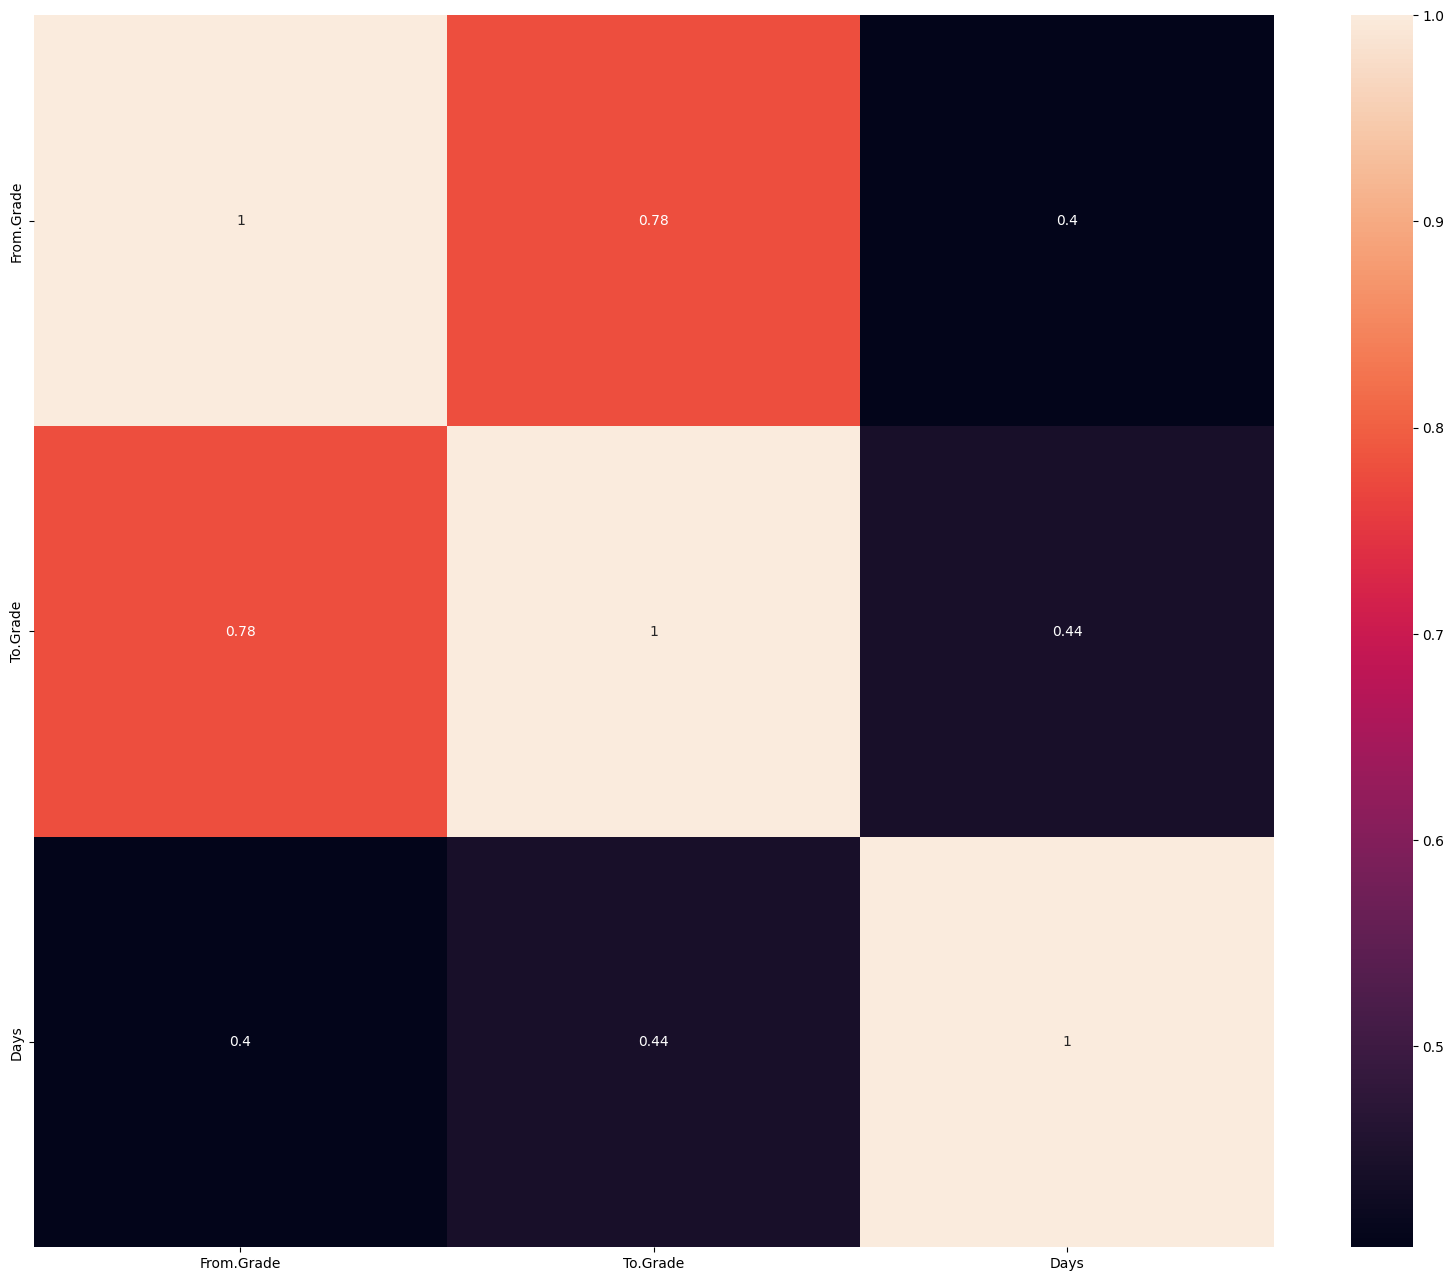

In [21]:
plt.figure(figsize=(20, 16))
sns.heatmap(data_numerical.corr(), fmt='.2g', annot=True)
plt.show()

### Segmentación y agregación

In [22]:
grouped_data = data81.groupby('From.Grade')
grouped_data.mean()  # Calcular la media para cada grupo
grouped_data.describe()  # Obtener estadísticas descriptivas para cada grupo


<ipython-input-22-e843cf537a6e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data.mean()  # Calcular la media para cada grupo


To.Grade                                                      \
              count       mean       std   min    25%   50%   75%   max   
From.Grade                                                                
3.0             5.0   5.800000  1.923538   3.0   5.00   6.0   7.0   8.0   
4.0           160.0   4.237500  0.598609   4.0   4.00   4.0   4.0   8.0   
5.0            92.0   6.065217  1.389160   5.0   5.00   6.0   6.0  12.0   
6.0           224.0   7.933036  1.041721   6.0   8.00   8.0   8.0  12.0   
7.0           512.0   8.062500  0.740233   7.0   8.00   8.0   8.0  12.0   
8.0          1105.0   8.079638  0.430907   8.0   8.00   8.0   8.0  12.0   
9.0            75.0  11.320000  1.152670   9.0  11.00  12.0  12.0  12.0   
10.0           24.0  11.416667  0.717282  10.0  11.00  12.0  12.0  12.0   
11.0           32.0  11.750000  0.439941  11.0  11.75  12.0  12.0  12.0   
12.0           10.0  12.000000  0.000000  12.0  12.00  12.0  12.0  12.0   

           Is.Non.Annual.            ... Num.of.Non_FPP.PAX        \
                    count      mean  ...                75%   max   
From.Grade                           ...                            
3.0                   5.0  0.600000  ...                2.0   2.0   
4.0                 160.0  0.106250  ...                2.0   7.0   
5.0                  94.0  0.244681  ...                3.0   9.0   
6.0                 226.0  0.252212  ...                2.0   8.0   
7.0                 515.0  0.337864  ...                3.0  19.0   
8.0                1121.0  0.049955  ...                4.0  47.0   
9.0                  75.0  0.186667  ...                2.0  11.0   
10.0                 24.0  0.083333  ...                2.0   5.0   
11.0                 32.0  0.343750  ...                4.0  11.0   
12.0                 10.0  0.100000  ...                2.0   4.0   

           Retained.in.2012.                                                
                       count      mean       std  min  25%  50%   75%  max  
From.Grade                                                                  
3.0                      5.0  0.200000  0.447214  0.0  0.0  0.0  0.00  1.0  
4.0                    160.0  0.700000  0.459696  0.0  0.0  1.0  1.00  1.0  
5.0                     94.0  0.510638  0.502567  0.0  0.0  1.0  1.00  1.0  
6.0                    226.0  0.345133  0.476467  0.0  0.0  0.0  1.00  1.0  
7.0                    515.0  0.401942  0.490767  0.0  0.0  0.0  1.00  1.0  
8.0                   1121.0  0.801070  0.399373  0.0  1.0  1.0  1.00  1.0  
9.0                     75.0  0.213333  0.412420  0.0  0.0  0.0  0.00  1.0  
10.0                    24.0  0.208333  0.414851  0.0  0.0  0.0  0.00  1.0  
11.0                    32.0  0.406250  0.498991  0.0  0.0  0.0  1.00  1.0  
12.0                    10.0  0.300000  0.483046  0.0  0.0  0.0  0.75  1.0  

[10 rows x 208 columns]

### Limpieza

#### Imputar valores faltantes

In [23]:
categorical_features = ['Program.Code', 'Group.State', 'Travel.Type']

for feature in categorical_features:
    data81[feature].fillna('missing_value', inplace=True)


In [24]:
from sklearn.impute import SimpleImputer

numerical_features = ['From.Grade', 'To.Grade', 'Days']

imputer = SimpleImputer(strategy='median')

data81[numerical_features] = imputer.fit_transform(data81[numerical_features])


In [25]:
# Approach:
# Categorical features: agregue una nueva categoría 'missing_value' (as if this is a new color, or gender)
# Numerical features: reeemplace con la mediana (o con la media, o con el valor más frecuente, dependerá de cada caso). Revisar el link: https://scikit-learn.org/stable/modules/impute.html
# + se debe agregar surrogate columns indicando que ese valor es imputado

# crear surrogates
for col in data81:
    if data81[col].isna().sum() != 0:
        data81[col + '_surrogate'] = data81[col].isna().astype(int)

# fixing categoricals
imputer = SimpleImputer(missing_values = np.nan, strategy='constant')
imputer.fit(data81.select_dtypes(exclude=['int64','float64']))
data81[data81.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(data81.select_dtypes(exclude=['int64','float64']))

# fixing numericals
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(data81.select_dtypes(include=['int64','float64']))
data81[data81.select_dtypes(include=['int64','float64']).columns] = imputer.transform(data81.select_dtypes(include=['int64','float64']))

# puede ver el resultado con: "Poverty.Code"
data81[['Poverty.Code','Poverty.Code_surrogate']]


Poverty.Code  Poverty.Code_surrogate
0                 B                     0.0
1                 C                     0.0
2                 C                     0.0
3     missing_value                     1.0
4                 D                     0.0
...             ...                     ...
2387  missing_value                     1.0
2388              B                     0.0
2389  missing_value                     1.0
2390  missing_value                     1.0
2391  missing_value                     1.0

[2392 rows x 2 columns]

In [26]:
# Limpieza de los datos creando dummy variables for non-numbers ("one hot encoding")
data81 = pd.get_dummies(data81, columns = data81.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

data81.head()  # Vas a observar que el data81 ahora tiene un tamaño de 252 columnas!!!


From.Grade  To.Grade  Is.Non.Annual.  Days  Tuition  FRP.Active  \
0         4.0       4.0             0.0   1.0    424.0        25.0   
1         8.0       8.0             0.0   7.0   2350.0         9.0   
2         8.0       8.0             0.0   3.0   1181.0        17.0   
3         9.0      12.0             1.0   3.0    376.0         0.0   
4         6.0       8.0             0.0   6.0    865.0        40.0   

   FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  Total.Discount.Pax  \
0            3.0                 0.424            3.0                 4.0   
1            9.0                 0.409           11.0                 3.0   
2            6.0                 0.708            6.0                 3.0   
3            0.0                 0.000            1.0                 0.0   
4            8.0                 0.494            9.0                 8.0   

   CRM.Segment  Parent.Meeting.Flag  MDR.High.Grade  Total.School.Enrollment  \
0          4.0                  1.0             5.0                    927.0   
1         10.0                  1.0             8.0                    850.0   
2         10.0                  1.0             8.0                    955.0   
3          7.0                  0.0             8.0                    597.0   
4         10.0                  1.0             8.0                    720.0   

   EZ.Pay.Take.Up.Rate  School.Sponsor   FPP  Total.Pax  SPR.Group.Revenue  \
0                0.170             1.0  59.0       63.0              424.0   
1                0.091             0.0  22.0       25.0             2350.0   
2                0.042             0.0  24.0       27.0             1181.0   
3                0.000             0.0  18.0       18.0              376.0   
4                0.383             0.0  81.0       89.0              865.0   

   NumberOfMeetingswithParents  DifferenceTraveltoFirstMeeting  \
0                          1.0                           155.0   
1                          2.0                           423.0   
2                          1.0                           124.0   
3                          0.0                           250.0   
4                          1.0                           145.0   

   DifferenceTraveltoLastMeeting  SingleGradeTripFlag  \
0                          155.0                  1.0   
1                          140.0                  1.0   
2                          124.0                  1.0   
3                          233.0                  0.0   
4                          145.0                  0.0   

   FPP.to.School.enrollment  FPP.to.PAX  Num.of.Non_FPP.PAX  \
0                  0.063646    0.936508                 4.0   
1                  0.025882    0.880000                 3.0   
2                  0.025131    0.888889                 3.0   
3                  0.045256    1.000000                 0.0   
4                  0.112500    0.910112                 8.0   

   Retained.in.2012.  ID_surrogate  Is.Non.Annual._surrogate  \
0                1.0           0.0                       0.0   
1                1.0           0.0                       0.0   
2                1.0           0.0                       0.0   
3                0.0           0.0                       0.0   
4                0.0           0.0                       0.0   

   Departure.Date_surrogate  Return.Date_surrogate  Deposit.Date_surrogate  \
0                       0.0                    0.0                     0.0   
1                       0.0                    0.0                     0.0   
2                       0.0                    0.0                     0.0   
3                       0.0                    0.0                     0.0   
4                       0.0                    0.0                     0.0   

   Special.Pay_surrogate  Tuition_surrogate  FRP.Active_surrogate  \
0                    1.0                0.0                   0.0   
1                    0.0                0.0               

#### Verificar la imputación de valores perdidos

In [27]:
# Limpiar utilizando categorias rate categories ("levels")

# Aquí hay una función personalizada que llamamos CombineRareCategories
# Esta función tiene dos argumentos: el nombre del data81(datos) y el número mínimo de puntos de datos para permanecer en una categoría separada (recuento mínimo)
# Esta función recorrerá todas las columnas en el data81 y combinará todas las categorías que aparecen en los archivos de datos en un número mínimo de veces y las etiquetara como (Otros)

def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    data81[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# Se aplica esta función a nuestros datos con min count=10
CombineRareCategories(data81, 10)

data81[0:10] #Para ver el resultado.


From.Grade  To.Grade  Is.Non.Annual.  Days  Tuition  FRP.Active  \
0         4.0       4.0             0.0   1.0    424.0        25.0   
1         8.0       8.0             0.0   7.0   2350.0         9.0   
2         8.0       8.0             0.0   3.0   1181.0        17.0   
3         9.0      12.0             1.0   3.0    376.0         0.0   
4         6.0       8.0             0.0   6.0    865.0        40.0   
5        10.0      12.0             0.0   4.0   2025.0         9.0   
6        11.0      12.0             1.0   6.0   1977.0        16.0   
7         9.0       9.0             0.0   8.0   3379.0        10.0   
8         8.0       8.0             0.0   8.0   2200.0        30.0   
9         8.0       8.0             0.0   4.0   1428.0        51.0   

   FRP.Cancelled  FRP.Take.up.percent.  Cancelled.Pax  Total.Discount.Pax  \
0            3.0                 0.424            3.0                 4.0   
1            9.0                 0.409           11.0                 3.0   
2            6.0                 0.708            6.0                 3.0   
3            0.0                 0.000            1.0                 0.0   
4            8.0                 0.494            9.0                 8.0   
5            4.0                 0.900            3.0                 1.0   
6            4.0                 0.640            5.0                 2.0   
7            0.0                 0.769            1.0                 1.0   
8            0.0                 0.577            0.0                 4.0   
9            1.0                 0.773            1.0                 6.0   

   CRM.Segment  Parent.Meeting.Flag  MDR.High.Grade  Total.School.Enrollment  \
0          4.0                  1.0             5.0                    927.0   
1         10.0                  1.0             8.0                    850.0   
2         10.0                  1.0             8.0                    955.0   
3          7.0                  0.0             8.0                    597.0   
4         10.0                  1.0             8.0                    720.0   
5          8.0                  1.0            12.0                    939.0   
6          8.0                  1.0            12.0                    225.0   
7          7.0                  1.0             8.0                    597.0   
8          5.0                  1.0            12.0                    500.0   
9          5.0                  1.0             8.0                    635.0   

   EZ.Pay.Take.Up.Rate  School.Sponsor   FPP  Total.Pax  SPR.Group.Revenue  \
0                0.170             1.0  59.0       63.0              424.0   
1                0.091             0.0  22.0       25.0             2350.0   
2                0.042             0.0  24.0       27.0             1181.0   
3                0.000             0.0  18.0       18.0              376.0   
4                0.383             0.0  81.0       89.0              865.0   
5                0.100             0.0  10.0       11.0             2025.0   
6                0.080             0.0  25.0       27.0             1977.0   
7                0.000             0.0  13.0       14.0             3379.0   
8                0.231             0.0  52.0       56.0             2200.0   
9                0.136             0.0  66.0       72.0             1428.0   

   NumberOfMeetingswithParents  DifferenceTraveltoFirstMeeting  \
0                          1.0                           155.0   
1                          2.0                           423.0   
2                          1.0                           124.0   
3                          0.0                           250.0   
4                          1.0                           145.0   
5                          1.0                            91.0   
6                          1.0                            63.0   
7                          1.0                           138.0   
8                          1.0                    

In [28]:
print(data81.shape)

(2392, 4121)


In [29]:
data81.isnull().sum()

From.Grade                           0
To.Grade                             0
Is.Non.Annual.                       0
Days                                 0
Tuition                              0
                                    ..
MajorProgramCode_missing_value       0
SchoolSizeIndicator_M-L              0
SchoolSizeIndicator_S                0
SchoolSizeIndicator_S-M              0
SchoolSizeIndicator_missing_value    0
Length: 4121, dtype: int64

<Axes: >

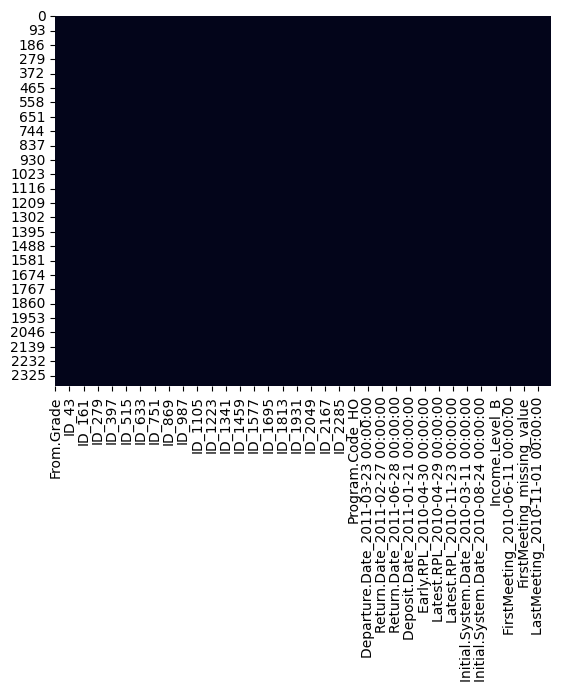

In [30]:
sns.heatmap(data81.isnull(), cbar=False)

### Codificación

#### Valores unicos

In [31]:
# Cantidad de valores únicos en las variables
variables = ['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition', 'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.', 'Cancelled.Pax', 'Total.Discount.Pax', 'CRM.Segment', 'Parent.Meeting.Flag', 'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate', 'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue', 'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting', 'DifferenceTraveltoLastMeeting', 'SingleGradeTripFlag', 'FPP.to.School.enrollment', 'FPP.to.PAX', 'Num.of.Non_FPP.PAX', 'Retained.in.2012.']
data81[variables].nunique().sort_values(ascending=False)

FPP.to.School.enrollment          1910
SPR.Group.Revenue                 1230
Tuition                           1230
Total.School.Enrollment            893
FRP.Take.up.percent.               476
EZ.Pay.Take.Up.Rate                371
DifferenceTraveltoFirstMeeting     342
FPP.to.PAX                         306
DifferenceTraveltoLastMeeting      251
Total.Pax                          159
FPP                                146
FRP.Active                          93
Cancelled.Pax                       34
FRP.Cancelled                       29
Num.of.Non_FPP.PAX                  26
Total.Discount.Pax                  26
Days                                12
MDR.High.Grade                      12
CRM.Segment                         11
From.Grade                          10
To.Grade                            10
NumberOfMeetingswithParents          3
School.Sponsor                       2
SingleGradeTripFlag                  2
Parent.Meeting.Flag                  2
Is.Non.Annual.           

#### Codificación de variables categóricas

In [32]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_features = ['Is.Non.Annual.', 'Parent.Meeting.Flag', 'School.Sponsor', 'SingleGradeTripFlag', 'CRM.Segment', 'NumberOfMeetingswithParents', 'Retained.in.2012.']
for feature in categorical_features:
    data81[feature] = le.fit_transform(data81[feature])

#### Selección de características

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data81.drop('Retained.in.2012.', axis=1)
y = data81['Retained.in.2012.']

selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

SelectKBest()

#### División de los datos

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Testeo y entrenamiento

#### Entrenamiento del modelo

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Evaluación del modelo

In [36]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70       212
           1       0.75      0.87      0.80       267

    accuracy                           0.76       479
   macro avg       0.77      0.75      0.75       479
weighted avg       0.77      0.76      0.76       479



#### Optimización del modelo

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       212
           1       0.74      0.88      0.80       267

    accuracy                           0.76       479
   macro avg       0.77      0.75      0.75       479
weighted avg       0.77      0.76      0.76       479



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Entrenamiento del modelo con validación cruzada estratificada
cv = StratifiedKFold(n_splits=5)
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Evaluación del modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       301
           1       0.80      0.81      0.80       281

    accuracy                           0.81       582
   macro avg       0.81      0.81      0.81       582
weighted avg       0.81      0.81      0.81       582

